# Exploratory Data Anaylysis

## Dataset Overview

In [1]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from langdetect import detect
import kagglehub
import shutil

In [2]:
# Download dataset
path = kagglehub.dataset_download("fronkongames/steam-games-dataset")
target_path = "../data/raw/"
os.makedirs(target_path, exist_ok=True)

# Move and rename the csv file
for file in os.listdir(path):
    if file.endswith(".csv"):
        shutil.move(os.path.join(path, file), os.path.join(target_path, "games.csv"))
        break

file_path = os.path.join(target_path, "games.csv")

In [3]:
# Read games.csv
games = pd.read_csv(file_path, index_col=False, header=None, skiprows=1)
cols = ['AppID', 'Name', 'Release date', 'Estimated owners', 'Peak CCU',
       'Required age', 'Price', 'Discount', 'DLC count', 'About the game',
       'Supported languages', 'Full audio languages', 'Reviews',
       'Header image', 'Website', 'Support url', 'Support email', 'Windows',
       'Mac', 'Linux', 'Metacritic score', 'Metacritic url', 'User score',
       'Positive', 'Negative', 'Score rank', 'Achievements', 'Recommendations',
       'Notes', 'Average playtime forever', 'Average playtime two weeks',
       'Median playtime forever', 'Median playtime two weeks', 'Developers',
       'Publishers', 'Categories', 'Genres', 'Tags', 'Screenshots', 'Movies']
games.columns = cols
games.head()

,AppID,Name,Release date,Estimated owners,Peak CCU,Required age,Price,Discount,DLC count,About the game,...,Average playtime two weeks,Median playtime forever,Median playtime two weeks,Developers,Publishers,Categories,Genres,Tags,Screenshots,Movies
0,20200,Galactic Bowling,"Oct 21, 2008",0 - 20000,0,0,19.99,0,0,Galactic Bowling is an exaggerated and stylize...,...,0,0,0,Perpetual FX Creative,Perpetual FX Creative,"Single-player,Multi-player,Steam Achievements,...","Casual,Indie,Sports","Indie,Casual,Sports,Bowling",https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...
1,655370,Train Bandit,"Oct 12, 2017",0 - 20000,0,0,0.99,0,0,THE LAW!! Looks to be a showdown atop a train....,...,0,0,0,Rusty Moyher,Wild Rooster,"Single-player,Steam Achievements,Full controll...","Action,Indie","Indie,Action,Pixel Graphics,2D,Retro,Arcade,Sc...",https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...
2,1732930,Jolt Project,"Nov 17, 2021",0 - 20000,0,0,4.99,0,0,Jolt Project: The army now has a new robotics ...,...,0,0,0,Campião Games,Campião Games,Single-player,"Action,Adventure,Indie,Strategy",NaN,https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...
3,1355720,Henosis™,"Jul 23, 2020",0 - 20000,0,0,5.99,0,0,HENOSIS™ is a mysterious 2D Platform Puzzler w...,...,0,0,0,Odd Critter Games,Odd Critter Games,"Single-player,Full controller support","Adventure,Casual,Indie","2D Platformer,Atmospheric,Surreal,Mystery,Puzz...",https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...
4,1139950,Two Weeks in Painland,"Feb 3, 2020",0 - 20000,0,0,0.00,0,0,ABOUT THE GAME Play as a hacker who has arrang...,...,0,0,0,Unusual Games,Unusual Games,"Single-player,Steam Achievements","Adventure,Indie","Indie,Adventure,Nudity,Violent,Sexual Content,...",https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...


In [4]:
games['Release date'] = pd.to_datetime(games['Release date'], format='mixed', errors='coerce')

In [5]:
# Inspect missing values
missing_values = games.isnull().sum()
missing_percentage = (games.isnull().sum() / len(games)) * 100

missing_df = pd.DataFrame({
    'Missing Values': missing_values,
    'Percentage': missing_percentage
}).sort_values(by='Missing Values', ascending=False)

missing_df = missing_df[missing_df["Missing Values"] > 0]
missing_df

,Missing Values,Percentage
Score rank,97366,99.954830
Metacritic url,93457,95.941895
Reviews,87285,89.605790
Notes,81937,84.115594
Website,54673,56.126681
Support url,51510,52.879581
Tags,29763,30.554358
Support email,16035,16.461349
Movies,7891,8.100811
Categories,5913,6.070219


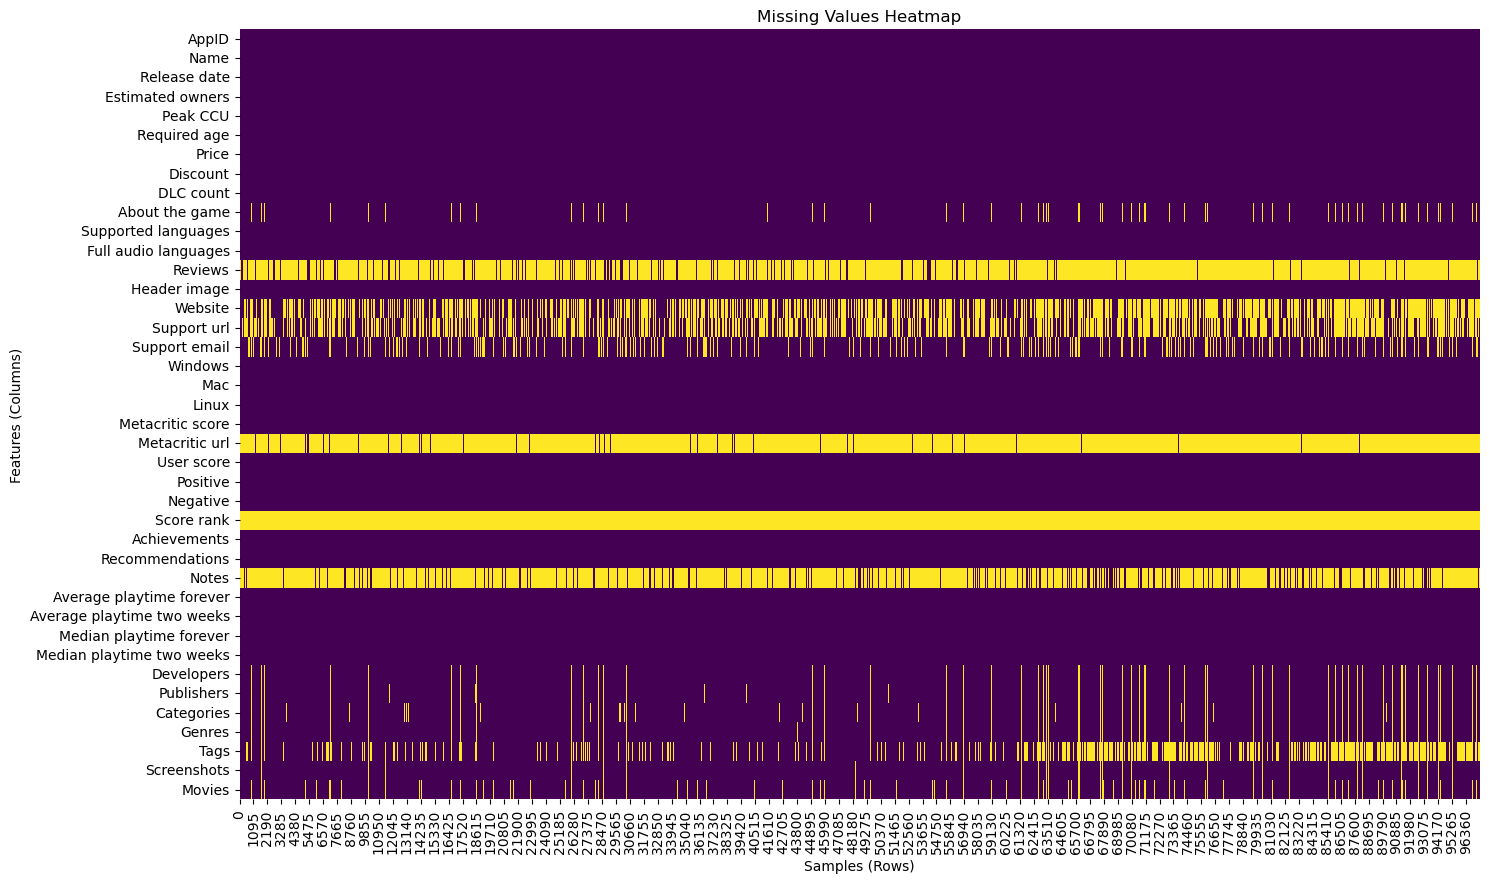

In [6]:
# Visualize missingness in the data
plt.figure(figsize=(16, 10))
ax = plt.axes()
sns.heatmap(games.isna().transpose(), cbar=False, ax=ax, cmap='viridis')

plt.xlabel('Samples (Rows)')
plt.ylabel('Features (Columns)')
plt.title('Missing Values Heatmap')

plt.show()

In [7]:
# Data cleaning
cols_to_drop = ['Score rank', 'Metacritic url', 'Reviews', 'Notes', 'Header image', 'Website', 
                'Support url', 'Discount', 'Support email', 'Screenshots', 'Movies', 'Estimated owners']

cleaned_games = games.drop(columns=cols_to_drop).dropna(subset=['Name'])
cleaned_games[['Estimated owners min', 'Estimated owners max']] = (
    games['Estimated owners'].str.replace(',', '').str.split(' - ', expand=True).astype(int)
)

In [8]:
# Handle missingness
cleaned_games = cleaned_games[
    ~(cleaned_games['About the game'].isna()) &
    ~(cleaned_games['Developers'].isna()) &
    ~(cleaned_games['Publishers'].isna())
]

In [9]:
# Convert strings into lists for categories, genres and tags 
cols_to_list = ['Categories', 'Genres', 'Tags']

for col in cols_to_list:
    cleaned_games[col] = cleaned_games[col].fillna('')
    cleaned_games[col] = cleaned_games[col].apply(lambda x: x.split(',') if isinstance(x, str) and '[' not in x else x)
cleaned_games.head()

,AppID,Name,Release date,Peak CCU,Required age,Price,DLC count,About the game,Supported languages,Full audio languages,...,Average playtime two weeks,Median playtime forever,Median playtime two weeks,Developers,Publishers,Categories,Genres,Tags,Estimated owners min,Estimated owners max
0,20200,Galactic Bowling,2008-10-21,0,0,19.99,0,Galactic Bowling is an exaggerated and stylize...,['English'],[],...,0,0,0,Perpetual FX Creative,Perpetual FX Creative,"[Single-player, Multi-player, Steam Achievemen...","[Casual, Indie, Sports]","[Indie, Casual, Sports, Bowling]",0,20000
1,655370,Train Bandit,2017-10-12,0,0,0.99,0,THE LAW!! Looks to be a showdown atop a train....,"['English', 'French', 'Italian', 'German', 'Sp...",[],...,0,0,0,Rusty Moyher,Wild Rooster,"[Single-player, Steam Achievements, Full contr...","[Action, Indie]","[Indie, Action, Pixel Graphics, 2D, Retro, Arc...",0,20000
2,1732930,Jolt Project,2021-11-17,0,0,4.99,0,Jolt Project: The army now has a new robotics ...,"['English', 'Portuguese - Brazil']",[],...,0,0,0,Campião Games,Campião Games,[Single-player],"[Action, Adventure, Indie, Strategy]",[],0,20000
3,1355720,Henosis™,2020-07-23,0,0,5.99,0,HENOSIS™ is a mysterious 2D Platform Puzzler w...,"['English', 'French', 'Italian', 'German', 'Sp...",[],...,0,0,0,Odd Critter Games,Odd Critter Games,"[Single-player, Full controller support]","[Adventure, Casual, Indie]","[2D Platformer, Atmospheric, Surreal, Mystery,...",0,20000
4,1139950,Two Weeks in Painland,2020-02-03,0,0,0.00,0,ABOUT THE GAME Play as a hacker who has arrang...,"['English', 'Spanish - Spain']",[],...,0,0,0,Unusual Games,Unusual Games,"[Single-player, Steam Achievements]","[Adventure, Indie]","[Indie, Adventure, Nudity, Violent, Sexual Con...",0,20000


In [10]:
cleaned_games['Words_in_about'] = cleaned_games['About the game'].str.len()
cleaned_games[cleaned_games['Words_in_about'] < 50]

,AppID,Name,Release date,Peak CCU,Required age,Price,DLC count,About the game,Supported languages,Full audio languages,...,Median playtime forever,Median playtime two weeks,Developers,Publishers,Categories,Genres,Tags,Estimated owners min,Estimated owners max,Words_in_about
1330,353540,Stephen's Sausage Roll,2016-04-17,10,0,29.99,0,A simple 3d puzzle game.,['English'],['English'],...,71,0,increpare games,increpare games,"[Single-player, Full controller support, Capti...",[Indie],"[Puzzle, Indie, Difficult, Singleplayer, Sokob...",50000,100000,24
3083,1280500,Terracosmic,2020-05-27,0,0,0.99,0,Terracosmic is a game.,['English'],['English'],...,0,0,Jakub Klementewicz,Jakub Klementewicz,[Single-player],"[Action, Adventure, Simulation, Strategy]","[Strategy, Action, Adventure, Simulation, Surv...",0,20000,22
3615,698950,Chaos and the White Robot,2017-09-15,0,0,0.99,0,[no description],"['Russian', 'English', 'French', 'Italian', 'G...",[],...,0,0,SDF games,SDF games,"[Single-player, Partial Controller Support]","[Action, Casual, Indie]","[Action, Indie, Casual, Hand-drawn]",0,20000,16
3863,437900,Party Jousting,2016-03-01,1,0,0.00,2,YouTube: Chicharoney,"['English', 'Swedish', 'French', 'Italian', 'G...",[],...,67,0,vikingfabian.com,vikingfabian.com,"[Multi-player, PvP, Shared/Split Screen PvP, S...","[Casual, Indie, Sports]","[Free to Play, Casual, Indie, Sports, Multipla...",1000000,2000000,20
5562,1109130,逝去的回忆3：四叶草之梦,2019-08-16,1,0,9.99,6,There is only Chinese summary about this game.,['Simplified Chinese'],['Simplified Chinese'],...,0,0,神族宝,神族宝,"[Single-player, Steam Achievements, Steam Trad...","[Indie, RPG]","[Indie, RPG, RPGMaker, Adventure]",0,20000,46
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77820,261390,Episode 1 - A Boy Learns What Fear Is,2014-01-06,0,0,0.00,0,Episode of 1 of Grimm - A Boy Learns What Fear Is,['English'],['English'],...,0,0,Spicy Horse Games,Spicy Horse Games,[Single-player],"[Casual, Indie]","[Indie, Casual]",0,20000,49
77863,1269720,已下架,2022-03-20,0,0,0.00,0,已下架,['Simplified Chinese'],[],...,0,0,已下架,已下架,[Multi-player],[Free to Play],"[Action RPG, World War II, Military, FPS, Adve...",50000,100000,3
80857,2371310,Morphus,2023-09-14,0,0,9.99,0,Socials,['English'],[],...,0,0,Manshu,Manshu,[Single-player],"[Adventure, Indie, RPG, Strategy, Early Access]",[],0,20000,7
90296,2633210,Catch Them Sweetie,2024-04-19,0,0,0.00,1,/,"['English', 'German', 'Spanish - Spain', 'Port...","['English', 'Russian']",...,0,0,byMixnez,byMixnez,"[Single-player, Steam Achievements, Steam Cloud]","[Casual, Simulation, Free to Play]",[],0,0,1


In [11]:
# Detect language in about
def detect_language(text):
    try:
        return detect(text)
    except:
        return 'unknown'

cleaned_games['About detected Language'] = cleaned_games['About the game'].apply(detect_language)
cleaned_games[cleaned_games['About detected Language'] != 'en']

,AppID,Name,Release date,Peak CCU,Required age,Price,DLC count,About the game,Supported languages,Full audio languages,...,Median playtime two weeks,Developers,Publishers,Categories,Genres,Tags,Estimated owners min,Estimated owners max,Words_in_about,About detected Language
82,1023420,四国志でらっくす ～酒池肉うどん戦記～,2020-07-31,0,0,24.99,0,※对于中文版本，搜索“四国志 ～酒池肉面战记～” ※中国語版は「四国志 ～酒池肉面战记～」で...,['Japanese'],[],...,0,Flying Panjandrum / ふらいんぐパンジャンドラム,Flying Panjandrum / ふらいんぐパンジャンドラム,[Single-player],"[Adventure, Indie, Simulation, Strategy]","[Adventure, Indie, Simulation, Strategy, Anime...",0,20000,1181,ja
122,926310,咕啾！文鸟恋爱物语 Love Story of Sparrow,2019-02-01,3,0,0.99,0,“上学途中惊现电车痴汉？好兄弟满脑子是关于我的黄色废料？生活终于要对我这只小公雀下手了吗┭┮...,['Simplified Chinese'],[],...,0,豆干叠叠木,豆干叠叠木,"[Single-player, Steam Achievements, Captions a...","[Adventure, Casual, Indie]","[Adventure, Casual, Indie, Sexual Content, Vis...",0,20000,995,zh-cn
148,717980,伏雨录：少年篇,2018-05-11,0,0,6.99,0,"简介: 伏雨录并非传统意义上仗剑天涯,快意恩仇的武侠游戏.它通篇只想表达这世间的'常态'.旨...",['Simplified Chinese'],[],...,0,祥,祥,"[Single-player, Steam Achievements]","[Adventure, Indie, RPG]","[Adventure, Indie, RPG, Drama, Turn-Based, Sto...",0,20000,412,zh-cn
166,1238130,禁忌,2020-02-16,0,0,0.99,0,十分普通的一款RPG游戏，如果不是剧情爱好者，只是一个非常简陋的走路模拟器而已 那么你能否在...,['Simplified Chinese'],['Simplified Chinese'],...,0,0,0,[Single-player],"[Adventure, Casual, Indie, RPG]",[],0,20000,205,zh-cn
226,1549420,メンヘラフレシア フラワリングアビス,2021-06-24,0,0,19.99,0,フリーゲーム原作「メンヘラフレシア」リメイク作品 「もういちど 特上のメンヘラ成分をあなたに...,['Japanese'],['Japanese'],...,0,CHARON,PGN Games,[Single-player],"[Adventure, Indie]","[Adventure, Visual Novel, 2D, Singleplayer, Da...",0,20000,461,ja
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96953,3128150,PBN - Da Game,2024-08-22,0,0,2.00,0,Ce jeu d'aventure dans son style 2D pixel vous...,['French'],['French'],...,0,Axxiomm,Caskiomm edition,"[Single-player, Family Sharing]","[Adventure, Indie]","[Adventure, 2D Fighter, Arcade, Farming Sim, I...",0,20000,450,fr
97030,3159840,四叶草咖啡厅,2024-08-30,0,0,0.00,0,白天这里是宁静的咖啡厅，只有稀稀拉拉的客人与店里养的一直肥猫，但到了夜晚，这里就变成了热闹非...,['Simplified Chinese'],['Simplified Chinese'],...,0,七月柒月七,七月柒月七,[Single-player],"[Adventure, Casual, Indie, Free To Play]",[],0,0,510,zh-cn
97094,3033900,Метаморфоз,2024-08-30,2,0,1.99,0,"Проникнитесь историей Майки – подростка, котор...",['Russian'],[],...,0,AKAI KIRI,AKAI KIRI,"[Single-player, Family Sharing]","[Adventure, Indie]","[Adventure, Visual Novel, Choices Matter, Mult...",0,20000,1886,ru
97106,1920770,飛天歷險國際中文版(Dream Of Mirror Online),2024-08-06,0,0,0.00,0,故事背景 崑崙鏡，記載著現實世界中所有一切的上古神器，鏡中世界中亦存在著一個映射現實的世...,"['Traditional Chinese', 'Simplified Chinese']",[],...,0,SOFTSTAR ENTERTAINMENT,SOFTSTAR ENTERTAINMENT,"[Multi-player, MMO, In-App Purchases, Steam Cl...","[Massively Multiplayer, RPG]",[],0,0,1211,ko


In [12]:
cleaned_games_en = cleaned_games[cleaned_games['About detected Language'] == 'en']
cleaned_games_en.head()

,AppID,Name,Release date,Peak CCU,Required age,Price,DLC count,About the game,Supported languages,Full audio languages,...,Median playtime two weeks,Developers,Publishers,Categories,Genres,Tags,Estimated owners min,Estimated owners max,Words_in_about,About detected Language
0,20200,Galactic Bowling,2008-10-21,0,0,19.99,0,Galactic Bowling is an exaggerated and stylize...,['English'],[],...,0,Perpetual FX Creative,Perpetual FX Creative,"[Single-player, Multi-player, Steam Achievemen...","[Casual, Indie, Sports]","[Indie, Casual, Sports, Bowling]",0,20000,1043,en
1,655370,Train Bandit,2017-10-12,0,0,0.99,0,THE LAW!! Looks to be a showdown atop a train....,"['English', 'French', 'Italian', 'German', 'Sp...",[],...,0,Rusty Moyher,Wild Rooster,"[Single-player, Steam Achievements, Full contr...","[Action, Indie]","[Indie, Action, Pixel Graphics, 2D, Retro, Arc...",0,20000,491,en
2,1732930,Jolt Project,2021-11-17,0,0,4.99,0,Jolt Project: The army now has a new robotics ...,"['English', 'Portuguese - Brazil']",[],...,0,Campião Games,Campião Games,[Single-player],"[Action, Adventure, Indie, Strategy]",[],0,20000,628,en
3,1355720,Henosis™,2020-07-23,0,0,5.99,0,HENOSIS™ is a mysterious 2D Platform Puzzler w...,"['English', 'French', 'Italian', 'German', 'Sp...",[],...,0,Odd Critter Games,Odd Critter Games,"[Single-player, Full controller support]","[Adventure, Casual, Indie]","[2D Platformer, Atmospheric, Surreal, Mystery,...",0,20000,615,en
4,1139950,Two Weeks in Painland,2020-02-03,0,0,0.00,0,ABOUT THE GAME Play as a hacker who has arrang...,"['English', 'Spanish - Spain']",[],...,0,Unusual Games,Unusual Games,"[Single-player, Steam Achievements]","[Adventure, Indie]","[Indie, Adventure, Nudity, Violent, Sexual Con...",0,20000,672,en
